<h1><font color="#113D68" size=5>TINTOlib: Converting Tidy Data into Image for Classification with 2-Dimensional Convolutional Neural Networks</font></h1>



<h1><font color="#113D68" size=6>How to read TINTO images</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo-Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>
<font color="#113D68" size=3>Luis Orozco-Barbosa</font><br>
</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Index</font></h2>

* [0. Context](#section0)
* [1. Description](#section1)
    * [1.1. Main Features](#section12)
    * [1.2. Citation](#section12)
* [2. Libraries](#section2)
* [3. Data processing](#section3)
    * [3.1. Read images](#section31)
    * [3.2. Data Curation](#section32)
* [4. Pre-modelling phase](#section4)
    * [4.1. Resize images](#section41)
    * [4.2. Iteradores](#section42)
* [5. Modelling with CNN](#section5)
    * [5.1. CNN](#section51)
    * [5.2. Compile and fit](#section52)
    * [5.3. Results](#section53)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Context</font>

This is a tutorial on how to read the images created by TINTO and pass them to a very simple pretrained Convolutional Neural Network (CNN). The images must already be created by the TINTO software. See the documentation in GITHUB for how to create the images from tabular data.

Remember that when using CNN you can set the training to be done with GPUs to improve performance.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [Information Fusion Journal](https://doi.org/10.1016/j.inffus.2022.10.011)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [SoftwareX](https://doi.org/10.1016/j.softx.2023.101391)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTO in [GitHub](https://github.com/oeg-upm/TINTO)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Description</font>

The growing interest in the use of algorithms-based machine learning for predictive tasks has generated a large and diverse development of algorithms. However, it is widely known that not all of these algorithms are adapted to efficient solutions in certain tidy data format datasets. For this reason, novel techniques are currently being developed to convert tidy data into images with the aim of using Convolutional Neural Networks (CNNs). TINTO offers the opportunity to convert tidy data into images through the representation of characteristic pixels by implementing two dimensional reduction algorithms: PCA and _t_-SNE. Our proposal also includes a blurring technique, which adds more ordered information to the image and can improve the classification task in CNNs.

---
<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Main Features</font>

- Supports all CSV data in **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
- For now, the algorithm converts tabular data for binary and multi-class classification problems into machine learning.
- Input data formats:
    - **Tabular files**: The input data must be in **[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Tidy Data**: The **target** (variable to be predicted) should be set as the last column of the dataset. Therefore, the first columns will be the features.
    - All data must be in numerical form. TINTO does not accept data in string or any other non-numeric format.
- Two dimensionality reduction algorithms are used in image creation, **[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)** and **[*t*-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)** from the Scikit-learn Python library.
- The synthetic images to be created will be in black and white, i.e. in 1 channel.
- The synthetic image **dimensions** can be set as a parameter when creating them.
- The synthetic images can be created using **characteristic pixels** or **blurring** painting technique (expressing an overlap of pixels as the **maximum** or **average**).
- Runs on **Linux**, **Windows** and **macOS** systems.
- Compatible with **[Python](https://www.python.org/)** 3.7 or higher.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Libraries</font>

The first thing we need to do is to declare the libraries

In [166]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
#import cv2
import gc
import matplotlib.pyplot as plt
#import openslide
#from openslide.deepzoom import DeepZoomGenerator
import tifffile as tifi
import sklearn
import tensorflow as tf
import seaborn as sns
from PIL import Image


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16, vgg19, resnet50, mobilenet, inception_resnet_v2, densenet, inception_v3, xception, nasnet, ResNet152V2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, InputLayer, LayerNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adamax
from tensorflow.keras import layers, models, Model
from tensorflow.keras.losses import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.layers import Input, Activation,MaxPooling2D, concatenate

from torchmetrics import MeanAbsolutePercentageError
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

import pytorch_lightning as pl
from pytorch_lightning.loggers  import TensorBoardLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping


from imblearn.over_sampling import RandomOverSampler

#Models of TINTOlib
from TINTOlib.tinto import TINTO
from TINTOlib.supertml import SuperTML
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.barGraph import BarGraph
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.combination import Combination

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. Data processing</font>

The first thing to do is to read all the images created by TINTO. TINTO creates a folder which contains subfolders corresponding to each target that has the problem. Each image corresponds to a sample of the original dataset.

<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. Create images with TINTOlib</font>

In [113]:
#Select the model and the parameters
problem_type = "regression"
image_model = TINTO(problem= problem_type,pixels=64,blur=True)

#Define the dataset path and the folder where the images will be saved
dataset_path = "C:\\Users\\Borja\\PycharmProjects\\TINTORERA\\Datasets\\boston.csv "
images_folder = "C:\\Users\\Borja\\PycharmProjects\\TINTORERA\\tintoimagesregression"




Normalize dataset

In [114]:
df = pd.read_csv(dataset_path)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [115]:
# Select all the attributes to normalize
columns_to_normalize = df.columns[:-1]

# Normalize between 0 and 1
df_normalized = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())

# Combine the attributes and the label
df_normalized = pd.concat([df_normalized, df[df.columns[-1]]], axis=1)

df_normalized.head(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.0,0.08968,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.0,0.20447,21.6


In [116]:
#Generate thet images
image_model.generateImages(df_normalized, images_folder)

img_paths = os.path.join(images_folder,problem_type+".csv")



print(img_paths)

C:\Users\Borja\PycharmProjects\TINTORERA\tintoimagesregression\regression.csv


<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Read images</font>

In [117]:
imgs = pd.read_csv(img_paths)

imgs["images"]= images_folder + "\\" + imgs["images"]

combined_dataset = pd.concat([imgs,df_normalized],axis=1)
combined_dataset

df_x = combined_dataset.drop("MEDV",axis=1).drop("values",axis=1)
df_y = combined_dataset["values"]

print(df_y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: values, Length: 506, dtype: float64


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Pre-modelling phase</font>

In [124]:
import cv2
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size = 0.40, random_state = 123)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = 123)

X_train_num = X_train.drop("images",axis=1)
X_val_num = X_val.drop("images",axis=1)
X_test_num = X_test.drop("images",axis=1)

X_train_img = np.array([cv2.imread(img) for img in X_train["images"]])
X_val_img = np.array([cv2.imread(img) for img in X_val["images"]])
X_test_img = np.array([cv2.imread(img) for img in X_test["images"]])


print(X_train_img[0].shape)
print(len(X_train_num.columns))

print(len(X_train_num),len(y_train),len(X_train_img))
print(len(X_val_num),len(y_val),len(X_val_img))

(64, 64, 3)
13
303 303 303
101 101 101


<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Modeling hybrid network</font>

In [168]:
dropout = 0.5

In [169]:
filters_ffnn = [64,32,16]

ff_inputs = Input(shape = (13,))
ff_x = ff_inputs

for layer in filters_ffnn:
    ff_x = Dense(layer, activation="relu")(ff_x)
    ff_x = Activation("relu")(ff_x)
    ff_x = BatchNormalization()(ff_x)
    ff_x = Dropout(dropout)(ff_x)
    
ff_model = Model(inputs=ff_inputs, outputs=ff_x)

In [172]:
filters_cnn = [64,32,16]
        
cnn_inputs = Input(shape = (64,64,3))
cnn_x= cnn_inputs
for layer in filters_cnn:
    cnn_x = Conv2D(layer, (3, 3), padding="same")(cnn_x)
    cnn_x = Activation("relu")(cnn_x)
    cnn_x = BatchNormalization()(cnn_x)
    cnn_x = MaxPooling2D(pool_size=(2, 2))(cnn_x)

# flatten the volume, then FC => RELU => BN => DROPOUT
cnn_x = Flatten()(cnn_x)
cnn_x = Dense(16)(cnn_x)
cnn_x = Activation("relu")(cnn_x)
cnn_x = BatchNormalization()(cnn_x)
cnn_x = Dropout(dropout)(cnn_x)

# apply another FC layer, this one to match the number of nodes
# coming out of the MLP
cnn_x = Dense(16)(cnn_x)
cnn_x = Activation("relu")(cnn_x)

# construct the CNN
cnn_model = Model(cnn_inputs, cnn_x)

In [173]:
combinedInput = concatenate([ff_model.output, cnn_model.output])
x = Dense(32, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)

model = Model(inputs=[ff_model.input, cnn_model.input], outputs=x)

In [174]:
METRICS = [
    tf.keras.metrics.MeanSquaredError(name = 'mse'),
    tf.keras.metrics.MeanAbsoluteError(name = 'mae'),
]

In [175]:
opt = Adam(learning_rate=1e-3)
model.compile(
    loss="mean_absolute_percentage_error", 
    optimizer=opt,
    metrics = METRICS
)

In [176]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=50)

In [178]:
model_history=model.fit(
    x=[X_train_num, X_train_img], y=y_train,
    validation_data=([X_val_num, X_val_img], y_val),
    epochs=100 , 
    batch_size=8,
    #steps_per_epoch = X_train_num.shape[0]//batch_size,
    #validation_steps = X_train_num.shape[0]//batch_size,
    #callbacks=[early_stopping]
)

Epoch 1/100
38/38 [==============================] - 4s 49ms/step - loss: 91.7007 - mse: 528.3000 - mae: 20.9069 - val_loss: 34.8777 - val_mse: 156.4361 - val_mae: 9.0872
Epoch 2/100
38/38 [==============================] - 2s 44ms/step - loss: 78.6251 - mse: 442.7474 - mae: 18.5466 - val_loss: 141.7005 - val_mse: 666.1413 - val_mae: 24.2102
Epoch 3/100
38/38 [==============================] - 2s 43ms/step - loss: 67.0531 - mse: 354.7157 - mae: 16.0482 - val_loss: 327.7643 - val_mse: 3726.6643 - val_mae: 60.2869
Epoch 4/100
38/38 [==============================] - 2s 43ms/step - loss: 48.9221 - mse: 230.0018 - mae: 11.9190 - val_loss: 610.5790 - val_mse: 13388.6855 - val_mae: 115.3175
Epoch 5/100
38/38 [==============================] - 2s 42ms/step - loss: 36.4235 - mse: 133.1440 - mae: 8.3263 - val_loss: 1677.6366 - val_mse: 104206.7891 - val_mae: 322.6629
Epoch 6/100
38/38 [==============================] - 2s 42ms/step - loss: 32.6706 - mse: 91.2627 - mae: 7.2519 - val_loss: 948.71

Epoch 49/100
38/38 [==============================] - 2s 41ms/step - loss: 22.1178 - mse: 59.0318 - mae: 5.0383 - val_loss: 15.6536 - val_mse: 39.4360 - val_mae: 3.9150
Epoch 50/100
38/38 [==============================] - 2s 43ms/step - loss: 21.9347 - mse: 52.6677 - mae: 4.9118 - val_loss: 24.3006 - val_mse: 43.2504 - val_mae: 5.1930
Epoch 51/100
38/38 [==============================] - 2s 44ms/step - loss: 21.8175 - mse: 49.5063 - mae: 4.7901 - val_loss: 922.8684 - val_mse: 29846.7305 - val_mae: 163.1944
Epoch 52/100
38/38 [==============================] - 2s 43ms/step - loss: 21.8803 - mse: 51.9409 - mae: 4.9816 - val_loss: 17.3948 - val_mse: 34.0802 - val_mae: 3.9154
Epoch 53/100
38/38 [==============================] - 2s 43ms/step - loss: 21.9897 - mse: 52.0781 - mae: 4.9831 - val_loss: 35.8401 - val_mse: 131.8886 - val_mae: 9.0512
Epoch 54/100
38/38 [==============================] - 2s 42ms/step - loss: 20.9371 - mse: 46.7231 - mae: 4.6579 - val_loss: 33.8035 - val_mse: 115.4

Epoch 97/100
38/38 [==============================] - 2s 41ms/step - loss: 20.1839 - mse: 44.9330 - mae: 4.4083 - val_loss: 27.5350 - val_mse: 75.7318 - val_mae: 5.5251
Epoch 98/100
38/38 [==============================] - 2s 43ms/step - loss: 19.4099 - mse: 44.7647 - mae: 4.4128 - val_loss: 19.5826 - val_mse: 64.9500 - val_mae: 5.1684
Epoch 99/100
38/38 [==============================] - 2s 42ms/step - loss: 21.5101 - mse: 49.1938 - mae: 4.7893 - val_loss: 17.3451 - val_mse: 49.7326 - val_mae: 4.4465
Epoch 100/100
38/38 [==============================] - 2s 43ms/step - loss: 19.0289 - mse: 41.7557 - mae: 4.2929 - val_loss: 16.0026 - val_mse: 39.2961 - val_mae: 3.9129


In [182]:
print(model_history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


<a id="section6"></a>
# <font color="#004D7F" size=6> 6. Results</font>

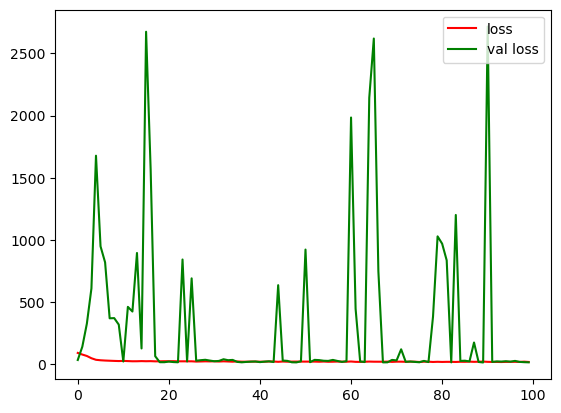

In [181]:
plt.plot(model_history.history['loss'], color = 'red', label = 'loss')
plt.plot(model_history.history['val_loss'], color = 'green', label = 'val loss')
plt.legend(loc = 'upper right')
plt.show()

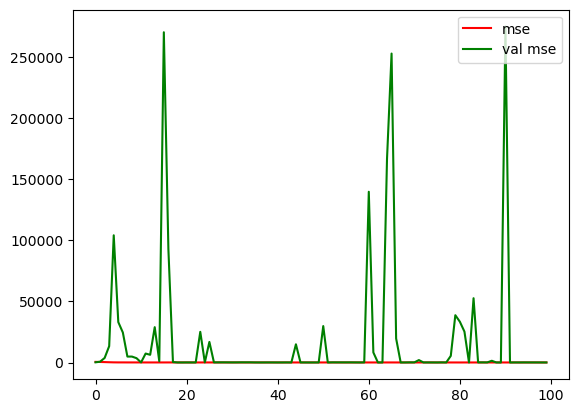

In [185]:
plt.plot(model_history.history['mse'], color = 'red', label = 'mse')
plt.plot(model_history.history['val_mse'], color = 'green', label = 'val mse')
plt.legend(loc = 'upper right')
plt.show()

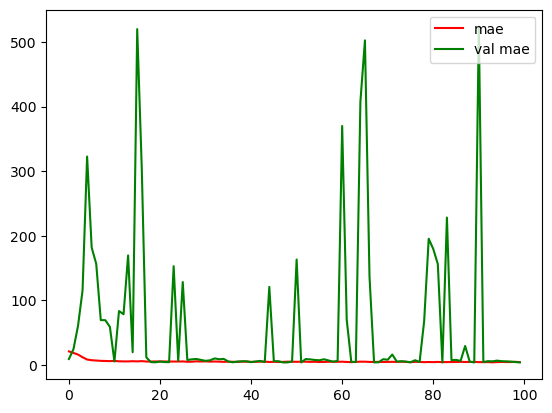

In [186]:
plt.plot(model_history.history['mae'], color = 'red', label = 'mae')
plt.plot(model_history.history['val_mae'], color = 'green', label = 'val mae')
plt.legend(loc = 'upper right')
plt.show()

In [187]:
prediction = model.predict([X_test_num,X_test_img])

mape = mean_absolute_percentage_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared=False)
r2 = r2_score(y_test, prediction)

# Print the evaluation metrics
print("Mean Absolute Percentage Error:", mape)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)


4/4 [==============================] - 0s 21ms/step
Mean Absolute Percentage Error: 0.16339477314565906
Mean Absolute Error: 3.6962418743208345
Mean Squared Error: 28.844506480370704
Root Mean Squared Error: 5.370708191697879
R2 Score: 0.6321519629186212


<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>